Data science for Housing market : analysis and prediction
Country : French
City : Aix-en-Provence
Summary : 
    - Import dataframe
    - Cleaning dataframe
    - Previsulation dataframe
    - Analyse "cours GAMBETTA"
    - General analyse of housing market in Aix-en-Provence
    - Generate simple randomForest and testing the model
    - Optimisation and criticism the model


1- Import dataFrame

In [269]:
#Import the CSV and create dataframe
%time 
import pandas as pd
df0 = pd.read_csv('#10.2_df_Aix-en-Provence_dvf.csv', sep='|')
df0.head()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Prefixe de section,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Year
0,1,03/01/2022,Vente,"150000,00",17.0,RUE,3050,VENDOME,13100.0,AIX EN PROVENCE,...,NaN,AR,101,30.0,1,2.0,Appartement,29.0,2.0,2022
1,1,11/01/2022,Vente,"28000,00",9001.0,RES,A200,L OLIVERAIE,13100.0,AIX EN PROVENCE,...,NaN,BM,98,345.0,1,3.0,Dépendance,0.0,0.0,2022
2,1,07/01/2022,Vente,"291000,00",9001.0,RES,A303,LES ASTERS,13100.0,AIX EN PROVENCE,...,NaN,BR,58,49.0,2,3.0,Dépendance,0.0,0.0,2022
3,1,07/01/2022,Vente,"291000,00",9001.0,RES,A303,LES ASTERS,13100.0,AIX EN PROVENCE,...,NaN,BR,58,49.0,2,2.0,Appartement,95.0,5.0,2022
4,1,07/01/2022,Vente,"291000,00",9001.0,RES,A303,LES ASTERS,13100.0,AIX EN PROVENCE,...,NaN,BR,58,49.0,2,3.0,Dépendance,0.0,0.0,2022


In [270]:
df0.shape

(16648, 22)

In [271]:
df0.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', '1er lot', 'Nombre de lots', 'Code type local',
       'Type local', 'Surface reelle bati', 'Nombre pieces principales',
       'Year'],
      dtype='object')

In [272]:
df0.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16648 entries, 0 to 16647
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No disposition             16648 non-null  int64  
 1   Date mutation              16648 non-null  object 
 2   Nature mutation            16648 non-null  object 
 3   Valeur fonciere            16614 non-null  object 
 4   No voie                    14608 non-null  float64
 5   Type de voie               14166 non-null  object 
 6   Code voie                  16648 non-null  object 
 7   Voie                       16648 non-null  object 
 8   Code postal                16648 non-null  float64
 9   Commune                    16648 non-null  object 
 10  Code departement           16648 non-null  int64  
 11  Code commune               16648 non-null  int64  
 12  Prefixe de section         0 non-null      float64
 13  Section                    16648 non-null  obj

In [273]:
df0.iloc[0]

No disposition                             1
Date mutation                     03/01/2022
Nature mutation                        Vente
Valeur fonciere                    150000,00
No voie                                 17.0
Type de voie                             RUE
Code voie                               3050
Voie                                 VENDOME
Code postal                          13100.0
Commune                      AIX EN PROVENCE
Code departement                          13
Code commune                               1
Prefixe de section                       NaN
Section                                   AR
No plan                                  101
1er lot                                 30.0
Nombre de lots                             1
Code type local                          2.0
Type local                       Appartement
Surface reelle bati                     29.0
Nombre pieces principales                2.0
Year                                    2022
Name: 0, d

2- Preprocessing  

In [274]:
#Preprocessing of the dataframe df0 -> df
def preprocessing(df) : 
    df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
    df['Year'] = df['Date mutation'].dt.year
    df['Months'] = df['Date mutation'].dt.month
    df['Day'] = df['Date mutation'].dt.day
    df = df.drop_duplicates()
    df = df[df['Type local'].isin(['Maison','Appartement'])]
    df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
    df['Valeur fonciere']  = df['Valeur fonciere'].astype(float)
    df['Code postal'] = df['Code postal'].astype(str)
    df = df[df['Valeur fonciere'] < 10000000]
    df = df[df['Surface reelle bati'] < 400]
    return df

df = df0.copy()   
df  = preprocessing(df)
    


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 0 to 16647
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   No disposition             7451 non-null   int64         
 1   Date mutation              7451 non-null   datetime64[ns]
 2   Nature mutation            7451 non-null   object        
 3   Valeur fonciere            7451 non-null   float64       
 4   No voie                    7378 non-null   float64       
 5   Type de voie               7165 non-null   object        
 6   Code voie                  7451 non-null   object        
 7   Voie                       7451 non-null   object        
 8   Code postal                7451 non-null   object        
 9   Commune                    7451 non-null   object        
 10  Code departement           7451 non-null   int64         
 11  Code commune               7451 non-null   int64         
 12  Prefi

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 0 to 16647
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   No disposition             7451 non-null   int64         
 1   Date mutation              7451 non-null   datetime64[ns]
 2   Nature mutation            7451 non-null   object        
 3   Valeur fonciere            7451 non-null   float64       
 4   No voie                    7378 non-null   float64       
 5   Type de voie               7165 non-null   object        
 6   Code voie                  7451 non-null   object        
 7   Voie                       7451 non-null   object        
 8   Code postal                7451 non-null   object        
 9   Commune                    7451 non-null   object        
 10  Code departement           7451 non-null   int64         
 11  Code commune               7451 non-null   int64         
 12  Prefi

In [277]:
df.iloc[0]

No disposition                                 1
Date mutation                2022-01-03 00:00:00
Nature mutation                            Vente
Valeur fonciere                         150000.0
No voie                                     17.0
Type de voie                                 RUE
Code voie                                   3050
Voie                                     VENDOME
Code postal                              13100.0
Commune                          AIX EN PROVENCE
Code departement                              13
Code commune                                   1
Prefixe de section                           NaN
Section                                       AR
No plan                                      101
1er lot                                     30.0
Nombre de lots                                 1
Code type local                              2.0
Type local                           Appartement
Surface reelle bati                         29.0
Nombre pieces princi

3- Plot data

<AxesSubplot: xlabel='Year', ylabel='count'>

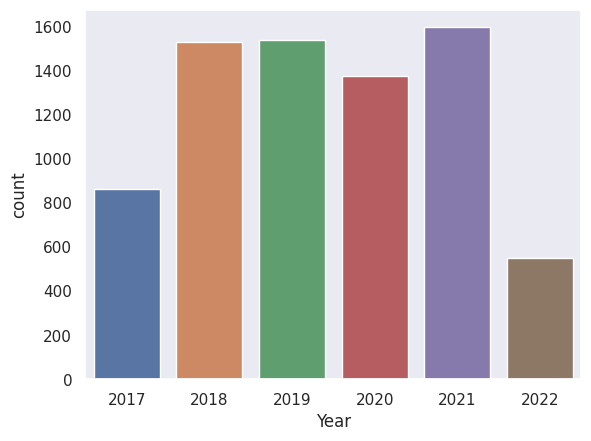

In [278]:
#Show the number of data by years
import seaborn as sns
sns.set(style='dark')
sns.countplot(x="Year",data=df)

In [279]:
#Show the price by years
import plotly.express as px
fig = px.box(df, x="Year", y="Valeur fonciere", hover_data=['No voie','Voie','Code postal',"Commune"])
fig.show() 
#On se limite au maison et appartement en dessosu de 10 millions

In [280]:
df['Voie'].value_counts()

LA TOUR D AYGOSI        111
DU ROI RENE              99
DE CUQUES                72
FELIBRE GAUT             71
AUGUSTIN FRESNEL         70
                       ... 
DES GRANDS VALLONS        1
DEPARTEMENTALE NO 10      1
L AUREGADE                1
LA SOURCE                 1
DE L'ARC DE MEYRAN        1
Name: Voie, Length: 580, dtype: int64

4- Analyse cours GAMBETTA

In [281]:
#Starting of the analyse of Houses in cours GAMBETTA
df_Gambetta = df[(df['Voie'] == 'GAMBETTA') & (df['Type local'] == 'Maison')]
df_Gambetta.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Year,Months,Day
1428,1,2021-01-11,Adjudication,37654.9,67.0,CRS,1180,GAMBETTA,13100.0,AIX EN PROVENCE,...,264,NaN,0,1.0,Maison,36.0,3.0,2021,1,11
1436,1,2021-01-11,Vente,80000.0,67.0,CRS,1180,GAMBETTA,13100.0,AIX EN PROVENCE,...,264,NaN,0,1.0,Maison,36.0,3.0,2021,1,11
1871,1,2021-02-26,Vente,1327179.0,61.0,CRS,1180,GAMBETTA,13100.0,AIX EN PROVENCE,...,186,NaN,0,1.0,Maison,220.0,9.0,2021,2,26
3567,1,2021-07-15,Vente,1522350.0,94.0,CRS,1180,GAMBETTA,13100.0,AIX EN PROVENCE,...,288,NaN,0,1.0,Maison,187.0,6.0,2021,7,15
7860,1,2020-10-16,Vente,270000.0,90.0,CRS,1180,GAMBETTA,13100.0,AIX EN PROVENCE,...,333,NaN,0,1.0,Maison,48.0,1.0,2020,10,16


In [282]:
df_Gambetta.count()

No disposition               10
Date mutation                10
Nature mutation              10
Valeur fonciere              10
No voie                      10
Type de voie                 10
Code voie                    10
Voie                         10
Code postal                  10
Commune                      10
Code departement             10
Code commune                 10
Prefixe de section            0
Section                      10
No plan                      10
1er lot                       0
Nombre de lots               10
Code type local              10
Type local                   10
Surface reelle bati          10
Nombre pieces principales    10
Year                         10
Months                       10
Day                          10
dtype: int64

In [283]:
#Same information with the price of 1m2
df_Gambetta['valeur au m2'] = df_Gambetta['Valeur fonciere']/df_Gambetta['Surface reelle bati']

df_Gambetta = df_Gambetta[df_Gambetta['valeur au m2'] < 10000].sort_values('Date mutation')
for index, row in df_Gambetta.iterrows():
    print( row['No voie'], row['Type de voie'], row['Voie'], row['Code postal'], row['Commune'],row['Valeur fonciere'],row['Surface reelle bati'],row['Year'],row['valeur au m2'])


69.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 2325135.0 386.0 2017 6023.665803108808
35.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 383600.0 100.0 2018 3836.0
35.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 650000.0 120.0 2018 5416.666666666667
90.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 270000.0 48.0 2020 5625.0
67.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 37654.9 36.0 2021 1045.9694444444444
67.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 80000.0 36.0 2021 2222.222222222222
61.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 1327179.0 220.0 2021 6032.631818181818
94.0 CRS GAMBETTA 13100.0 AIX EN PROVENCE 1522350.0 187.0 2021 8140.909090909091


/tmp/ipykernel_12964/272160155.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5- Analyse global data set

In [284]:
#Starting of the analyse of Houses in cours GAMBETTA
df_S400 = df[df['Surface reelle bati'] > 400]

In [285]:
#Analysis of lagest houses

df_S400['valeur au m2'] = df_S400['Valeur fonciere']/df_S400['Surface reelle bati']

#df_S400 = df_S400[df_S400['valeur au m2'] < 10000].sort_values('Date mutation')
for index, row in df_S400.iterrows():
    print( row['No voie'], row['Type de voie'], row['Voie'], row['Code postal'], row['Commune'],row['Valeur fonciere'],row['Surface reelle bati'],row['Year'],row['valeur au m2'])


In [286]:
#Startingv the analyse of all the houses in Aix-en-Provence
top_10 = df['Voie'].value_counts().nlargest(10).index.tolist()
print(top_10)

['LA TOUR D AYGOSI', 'DU ROI RENE', 'DE CUQUES', 'FELIBRE GAUT', 'AUGUSTIN FRESNEL', 'MANUEL', 'VERRERIE', 'JULES FERRY', 'SEXTIUS', 'DU FOUR']


In [287]:
df_top_10 = df[df['Voie'].isin(top_10)]
df_top_10.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Year,Months,Day
31,1,2022-01-10,Vente,467550.0,18.0,BD,2670,DU ROI RENE,13100.0,AIX EN PROVENCE,...,1,215.0,2,2.0,Appartement,71.0,3.0,2022,1,10
98,1,2022-01-04,Vente,118000.0,8.0,RUE,3070,VERRERIE,13100.0,AIX EN PROVENCE,...,139,9.0,1,2.0,Appartement,18.0,1.0,2022,1,4
99,1,2022-01-10,Vente,240000.0,410.0,AV,0142,AUGUSTIN FRESNEL,13100.0,AIX EN PROVENCE,...,36,743.0,1,2.0,Appartement,63.0,3.0,2022,1,10
104,1,2022-01-22,Vente,253100.0,360.0,AV,0142,AUGUSTIN FRESNEL,13100.0,AIX EN PROVENCE,...,36,448.0,1,2.0,Appartement,59.0,3.0,2022,1,22
113,1,2022-01-10,Vente,125000.0,31.0,RUE,3070,VERRERIE,13100.0,AIX EN PROVENCE,...,403,40.0,1,2.0,Appartement,25.0,1.0,2022,1,10


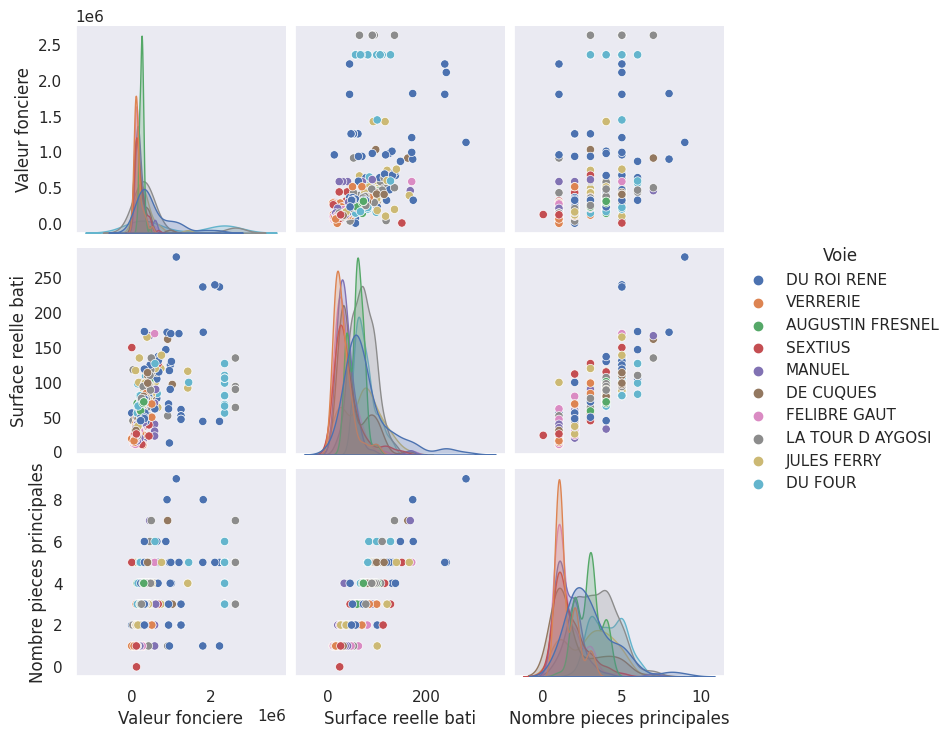

In [288]:
#Distribution of houses
import seaborn as sns
sns.pairplot(df_top_10[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Voie']],hue ="Voie")

In [289]:

df['valeur au m2'] = df['Valeur fonciere']/df['Surface reelle bati']


In [290]:
df1 = df[df['valeur au m2'] < 10000].sort_values('Date mutation')

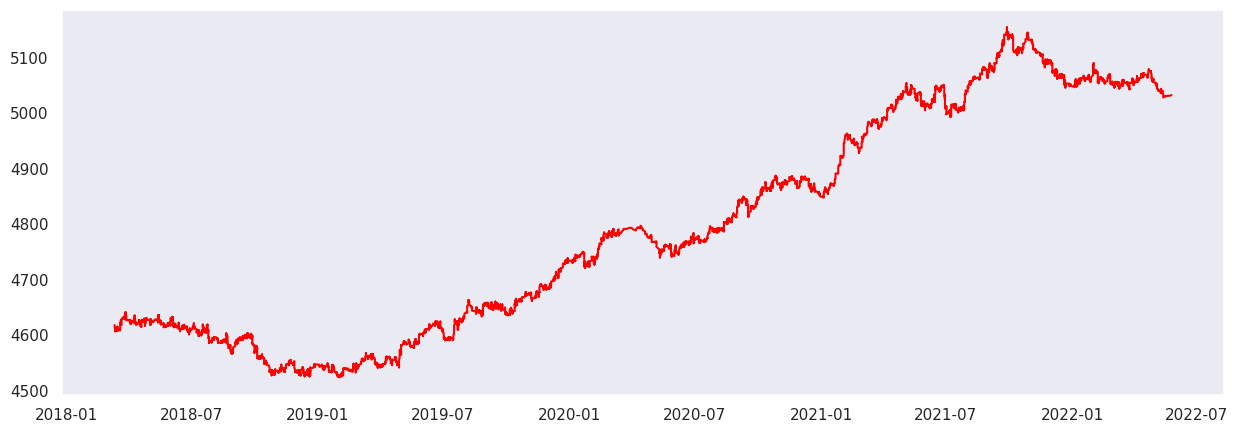

In [291]:
#Show the price of 1m2 for each house
#Use a mobile average to extract the trend
import matplotlib.pyplot as plt
date = df1[df1['valeur au m2'] < 10000]['Date mutation']
valeur_moy = df1[df1['valeur au m2'] < 10000]['valeur au m2'].rolling(window=1000).mean()
fig = plt.figure(1, figsize=(15, 5))
fig = px.line(df[df['valeur au m2'] < 10000].sort_values('Date mutation'), x="Date mutation", y="valeur au m2", title='Evolution du prix Aix')
fig.show()
plt.plot(date,valeur_moy, color='red')

plt.show()

In [292]:
'Variation of the price from low to high : 13% in 3 years'

'Variation of the price from low to high : 13% in 3 years'

6- Generate the first predict model

In [293]:

df['Code postal'].value_counts(dropna=True)

13100.0    7451
Name: Code postal, dtype: int64

In [294]:
df.isnull().sum()

No disposition                  0
Date mutation                   0
Nature mutation                 0
Valeur fonciere                 0
No voie                        73
Type de voie                  286
Code voie                       0
Voie                            0
Code postal                     0
Commune                         0
Code departement                0
Code commune                    0
Prefixe de section           7451
Section                         0
No plan                         0
1er lot                      1217
Nombre de lots                  0
Code type local                 0
Type local                      0
Surface reelle bati             0
Nombre pieces principales       0
Year                            0
Months                          0
Day                             0
valeur au m2                    0
dtype: int64

In [295]:
#Generate Input and output for prediction
y = df['Valeur fonciere']
X= df[['Nombre de lots','Year','Months','Day','Nombre pieces principales','Surface reelle bati','Code postal']].fillna(0)
     

In [296]:
import numpy as np
X = X.to_numpy(dtype=float)
np.nan_to_num(X, copy=False)


array([[1.000e+00, 2.022e+03, 1.000e+00, ..., 2.000e+00, 2.900e+01,
        1.310e+04],
       [2.000e+00, 2.022e+03, 1.000e+00, ..., 5.000e+00, 9.500e+01,
        1.310e+04],
       [0.000e+00, 2.022e+03, 1.000e+00, ..., 5.000e+00, 1.180e+02,
        1.310e+04],
       ...,
       [1.000e+00, 2.017e+03, 1.000e+01, ..., 1.000e+00, 3.500e+01,
        1.310e+04],
       [0.000e+00, 2.017e+03, 1.100e+01, ..., 4.000e+00, 9.700e+01,
        1.310e+04],
       [1.000e+00, 2.017e+03, 1.200e+01, ..., 3.000e+00, 6.000e+01,
        1.310e+04]])

In [297]:
y.shape

(7451,)

In [298]:
X.shape

(7451, 7)

In [299]:
#Split test and train set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [300]:
#Choose the model
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=0)

In [301]:
#Apply the model
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [302]:
#Test the model
regr.score(X_test, y_test) # évaluation

0.4149894343866677

In [303]:
'Not accurate model'

'Not accurate model'

In [304]:
regr.score(X_train, y_train) # évaluation

0.48324206500988465

In [305]:
#PGenerate predict fonction

def prix(regr, Nb_lot=3, year=2022, months = 2022 ,day =2022 , piece=3.0, S= 200.0, Code_postal = 13100):
  x = np.array([Nb_lot, year, months  ,day  , piece, S, Code_postal ]).reshape(1, 7)
  return regr.predict(x)

In [306]:
#Try a prediction
print(int(prix(regr)))

1259953


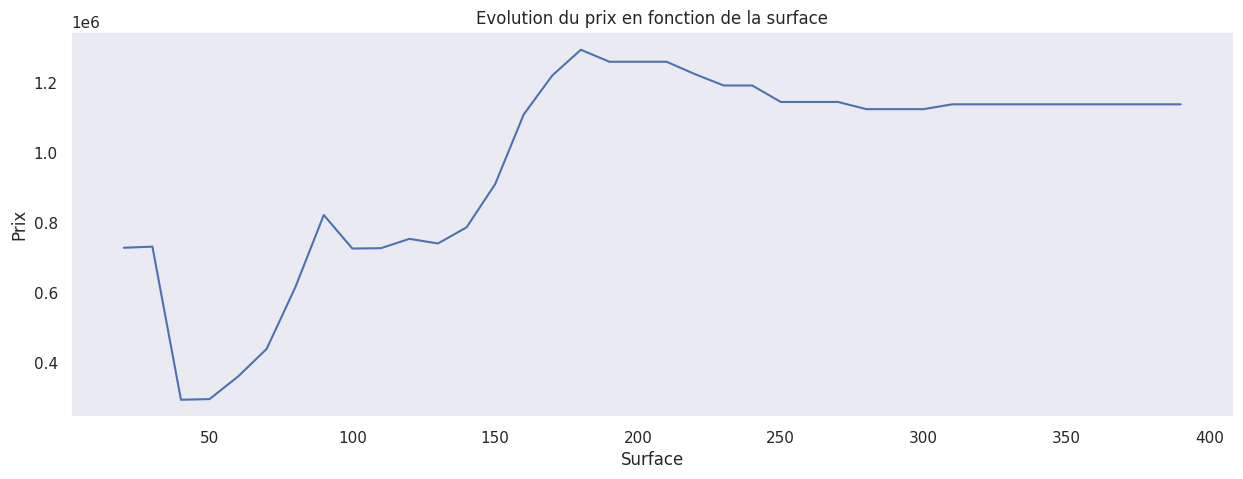

In [310]:
#Show the evolution of the price depending on the surface
L_prix = []
L_surf = np.arange(20,400,10)
for i in L_surf: 
    L_prix.append(prix(regr, S=i))
    
plt.figure(1, figsize=(15, 5))
plt.plot(L_surf, L_prix)
plt.xlabel('Surface')
plt.ylabel('Prix')
plt.title('Evolution du prix en fonction de la surface')
plt.show()

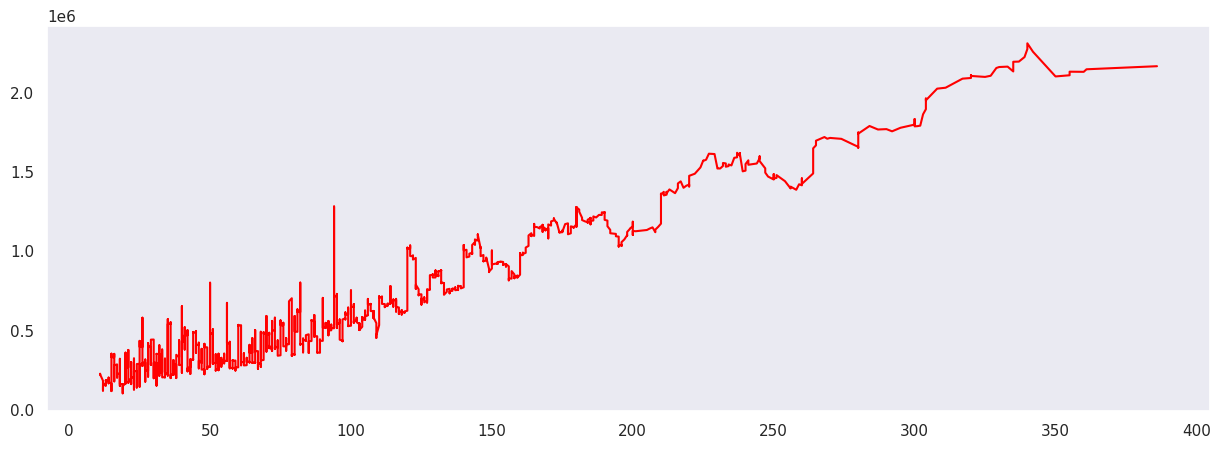

In [308]:
#Show the price of 1m2 for each house
#Use a mobile average to extract the trend
import matplotlib.pyplot as plt
df1 = df.sort_values('Surface reelle bati')
Surf = df1['Surface reelle bati']
valeur_moy = df1['Valeur fonciere'].rolling(window=50).mean()
fig = plt.figure(1, figsize=(15, 5))
fig = px.line(df1, x="Surface reelle bati", y="Valeur fonciere", title='Evolution du prix Aix')
fig.show()
plt.plot(Surf,valeur_moy, color='red')

plt.show()

'The model underestimate the reel price'

7- Optimisation and criticism the model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [ ]:
#Testing score with 5 splits
cv = KFold(5, shuffle= True, random_state=10)
cross_val_score(RandomForestRegressor(),X,y,cv = cv).mean()

0.5291360126794767

In [ ]:
from sklearn.model_selection import validation_curve

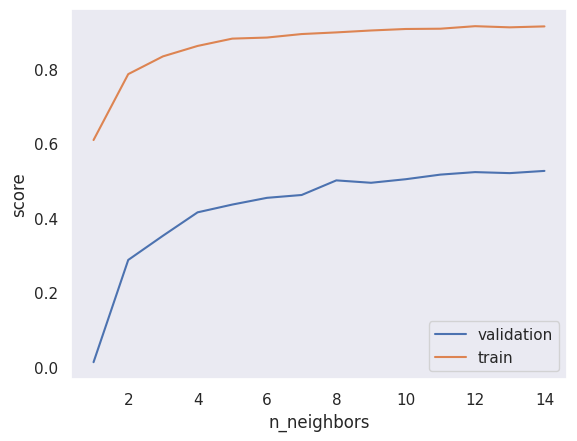

In [ ]:
model = RandomForestRegressor()
k = np.arange(1, 15)
train_score, val_score = validation_curve(model,X_train,y_train,param_name='n_estimators',param_range= k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {'n_estimators': np.arange(1, 15),'max_depth' : np.arange(20)}


In [ ]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)


/home/hugo/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


70 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hugo/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hugo/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/home/hugo/.local/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/home/hugo/.local/lib/pyth

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
grid.best_score_

0.5419352008785556

In [ ]:
grid.best_params_

{'max_depth': 13, 'n_estimators': 14}

In [ ]:
model = grid.best_estimator_

In [ ]:
int(prix(model))

1571443

prix métre carré estimé : 5000€
surface : 200 m2
prix estimé : 1 million

In [ ]:
#Learning_curve
from sklearn.model_selection import learning_curve


[ 399  491  584  676  768  860  953 1045 1137 1229 1322 1414 1506 1598
 1691 1783 1875 1967 2059 2152 2244 2336 2428 2521 2613 2705 2797 2890
 2982 3074 3166 3259 3351 3443 3535 3628 3720 3812 3904 3997]


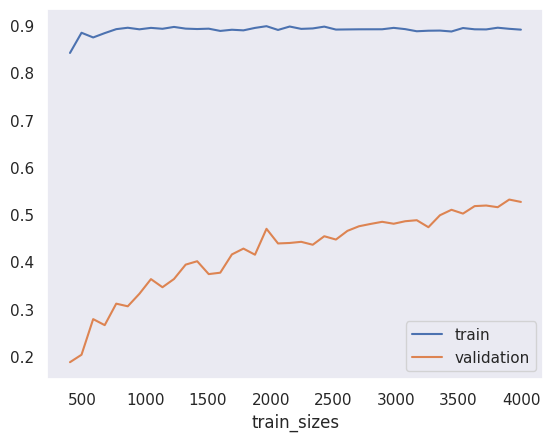

In [ ]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 40), cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label = 'train')
plt.plot(N,val_score.mean(axis=1),label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

Le model manque de precision malgré l'optimisation des hyperparamétres. On remarque que la learning curve n'est pas encore à plat on devrait gagner en précission. Cependant l'allure logarythmique de la courbe nous laisse penser qu'il serait difficile d'atteindre un accuracy supérieur à 0,7.